<a href="https://colab.research.google.com/github/ubhareharshal007/test/blob/main/Copy_of_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

VFILE = "/content/classTest.mp4"

In [ ]:
def get_frames(filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            yield frame
        else:

            break
    video.release()
    yield None

In [ ]:
from google.colab.patches import cv2_imshow
my_cnt=1
for f in get_frames(VFILE):
    if f is None:
        break
    #cv2.imshow('frame', f)
    #if my_cnt>10 and my_cnt<31:
    cv2_imshow(f)
    print(my_cnt)
    my_cnt=my_cnt+1
    #print(my_cnt)
    # Hit Escape to stop
    if cv2.waitKey(10) == 27:
        break

cv2.destroyAllWindows()

In [ ]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()

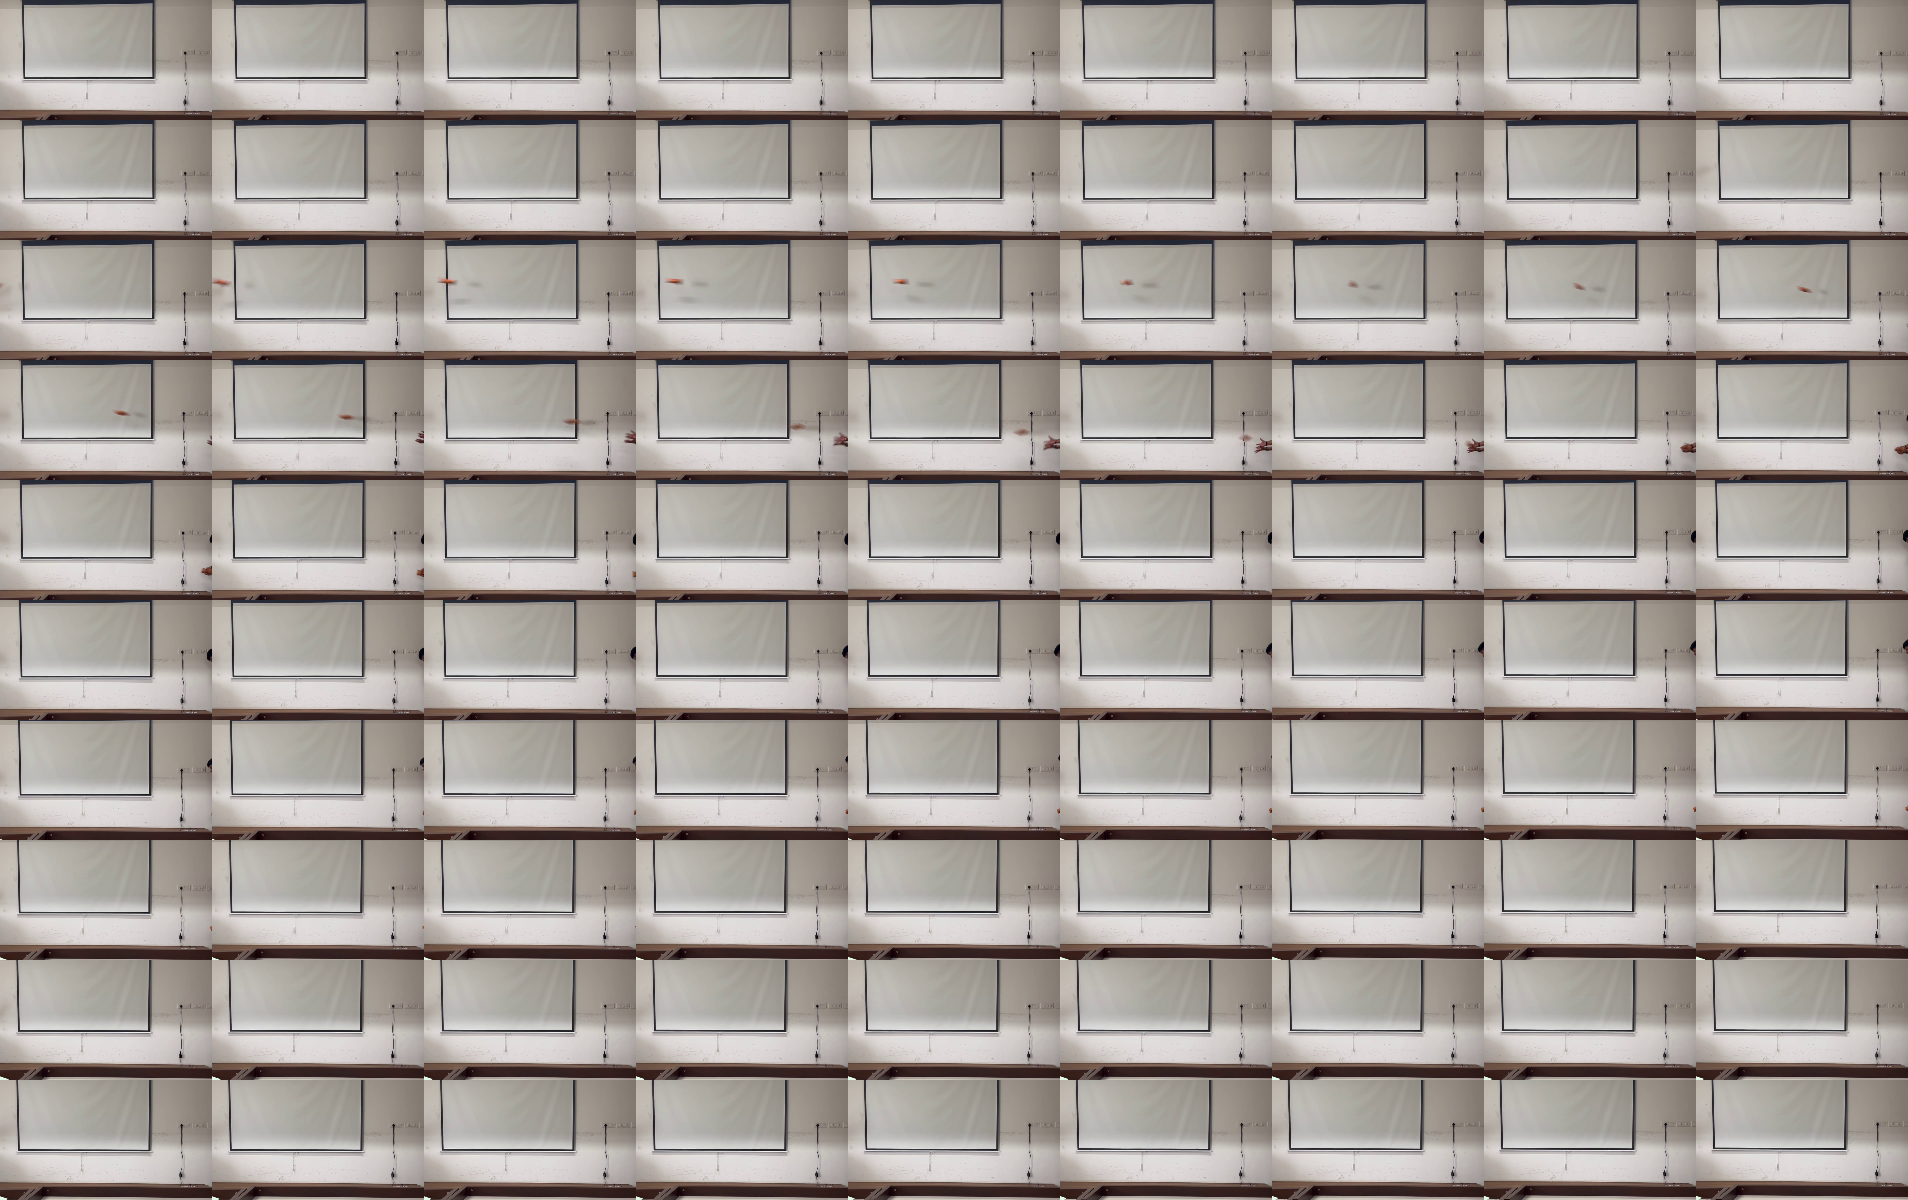

In [ ]:
# Collage
COLLAGE = (10,9) # 3 rows, 5 columns

collage_frames = COLLAGE[0] * COLLAGE[1]
skip_frames = count // collage_frames

frames = []
counter = 0
for f in get_frames(VFILE):
    if counter > 0 and counter % skip_frames == 0:
        frames.append(f)
    counter += 1
print()
ROWS, COLS, _ = frames[0].shape

out = np.zeros( (ROWS*COLLAGE[0], COLS*COLLAGE[1], 3), dtype=np.uint8 )
idx = 0
for i in range(COLLAGE[0]):
    for j in range(COLLAGE[1]):
        out[ROWS*i:ROWS*(i+1), COLS*j:COLS*(j+1), :] = frames[idx]
        idx += 1

out = cv2.resize(out, (out.shape[1]//4, out.shape[0]//4) )
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()
